# **Data Science & Business Analytics intern at The Sparks Foundation.**
## Author:Moses Kiboma


# **Prediction using Clustering(Kmeans,Hierarchical )** 

### 
From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.
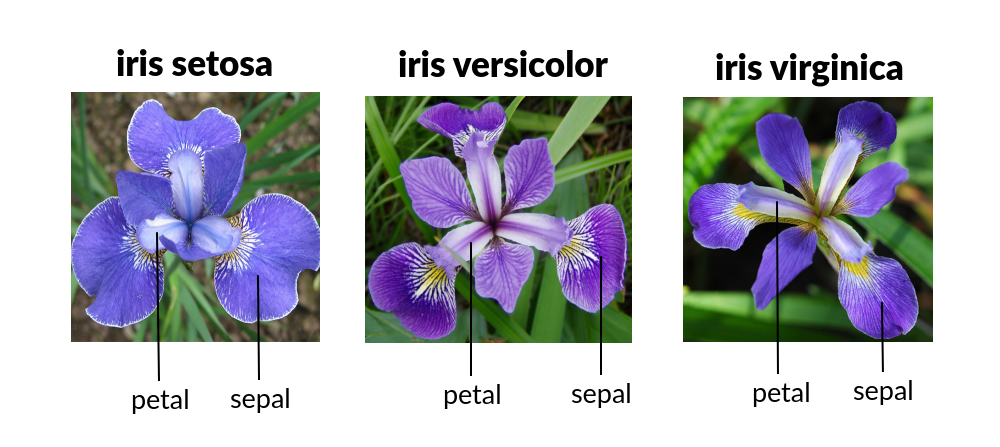

## **K-Means**

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.



### **1.IMPORTING REQUIRED LIBRARIES**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head()) # See the first 5 rows



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


#### **2. DETERMINING THE OPTIMUM NUMBER OF CLUSTERS USING THE ELBOW METHOD**

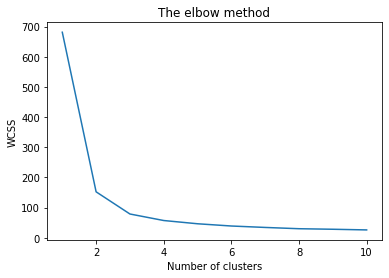

In [2]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### CONCLUSION - OPTIMUM NUMBER OF CLUSTERS IS  **3**

### **3. CREATING THE KMEANS CLASSIFIER**

In [3]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


In [4]:
from sklearn.metrics import adjusted_rand_score

r_score = adjusted_rand_score(iris.target, y_kmeans)

In [5]:
print( " Score:", r_score)

 Score: 0.7302382722834697


### **4. PLOTING THE CLUSTERS**

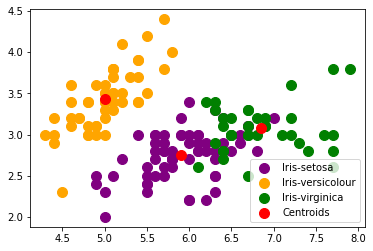

In [6]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()



### **5. Labeling the predictions**

In [7]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)


### **6. Adding the prediction to the dataset**

In [8]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

            Cluster  
0  Iris-versicolour  
1  Iris-versicolour  
2  Iris-versicolour  
3  Iris-versicolour  
4  Iris-versicolour  


# **DATA VISUALISATION**

### **7. BARPLOT- CLUSTER DISTRIBUTION**

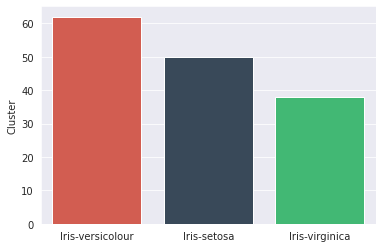

In [9]:
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));

### **Bar Plot Inference** -
There are around 62 iris-versicolour , 50 Iris-virginica and roughly 38 Iris-setosa samples in the dataset as predicted.

### **8. Violin plot**

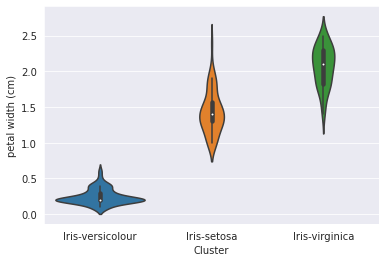

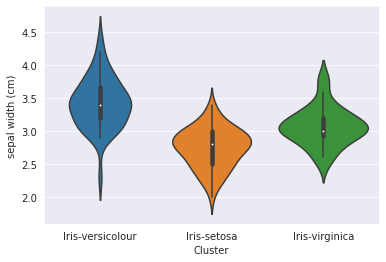

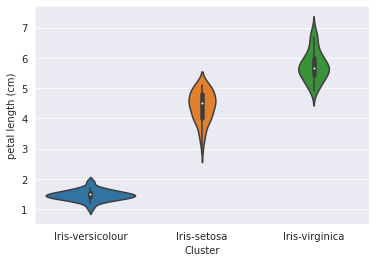

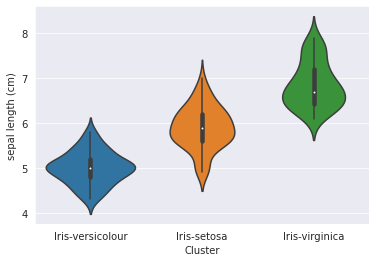

In [10]:
sns.violinplot(x="Cluster",y="petal width (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="sepal width (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="petal length (cm)",data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster",y="sepal length (cm)",data=data_with_clusters)
plt.show()


### **9. PAIRPLOT**

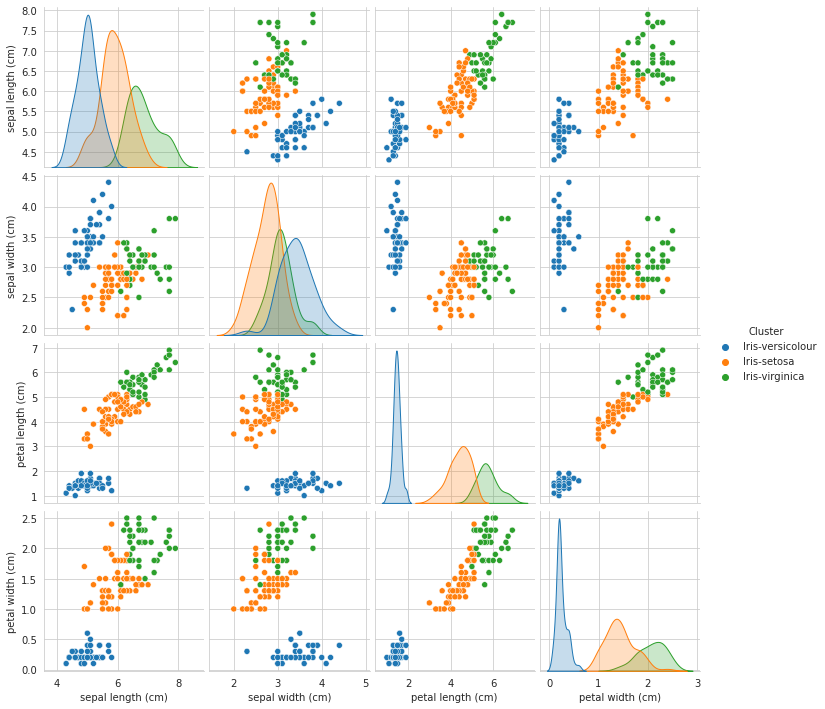

In [11]:
#hue = species colours plot as per species
# It will give 3 colours in the plot

sns.set_style('whitegrid')   ### Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster'); 

### **PairPlot insights**



1.   petal-length and petal-width seem to be positively correlated(seem to be having a linear relationship).
2.   Iris-Setosa seems to have smaller petal length and petal width as compared to others.
3.   Looking at the overall scenario, it seems to be the case that Iris-Setosa has smaller dimensions than other flowers.






# Hierarchical Clustering 

#### Let's now use sklearn's AgglomerativeClustering to conduct the heirarchical clustering


In [12]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris.data)

In [13]:
# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
# Fit & predict
complete_pred = complete.fit_predict(iris.data)
# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
# Fit & predict

avg_pred = avg.fit_predict(iris.data)

To determine which clustering result better matches the original labels of the samples, we can use adjusted_rand_score which is an external cluster validation index which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

In [14]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(iris.target, ward_pred)

In [15]:
 #The adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)
# The adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

 Which algorithm results in the higher Adjusted Rand Score?

In [16]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.7311985567707746 
Complete:  0.6422512518362898 
Average:  0.7591987071071522


# Normalization on Clustering

In [17]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(iris.data)
normalized_X[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

Now all the columns are in the range between 0 and 1. Would clustering the dataset after this transformation lead to a better clustering? (one that better matches the original labels of the samples)


In [18]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(normalized_X)

avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(normalized_X)


ward_ar_score = adjusted_rand_score(iris.target, ward_pred)
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352


In [19]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'ward' # Ward has the highest adjusted_rand_score
#linkage_type = 'complete'
#linkage_type = 'average'
#linkage_type = 'weighted'
#linkage_type = 'centroid'

linkage_matrix = linkage(normalized_X, linkage_type)


# Visualizations

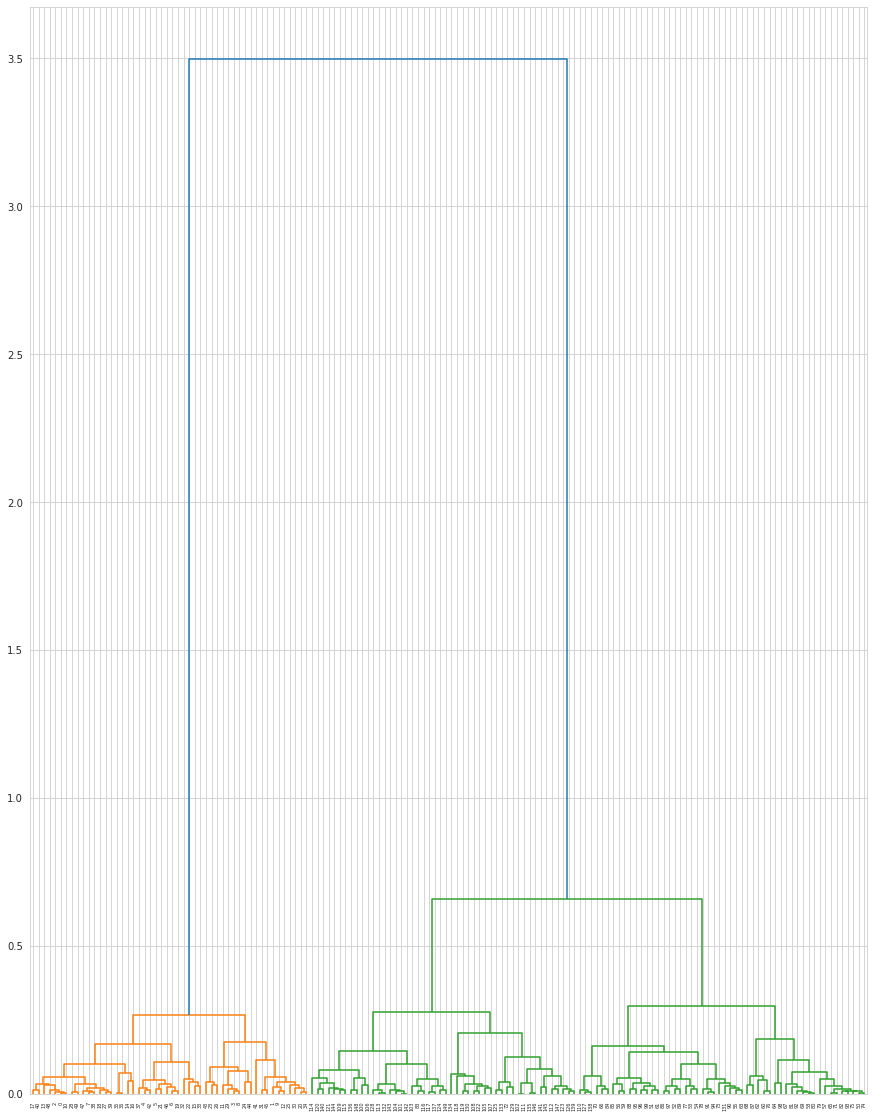

In [22]:
#Plot using scipy's dendrogram function
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15,20))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

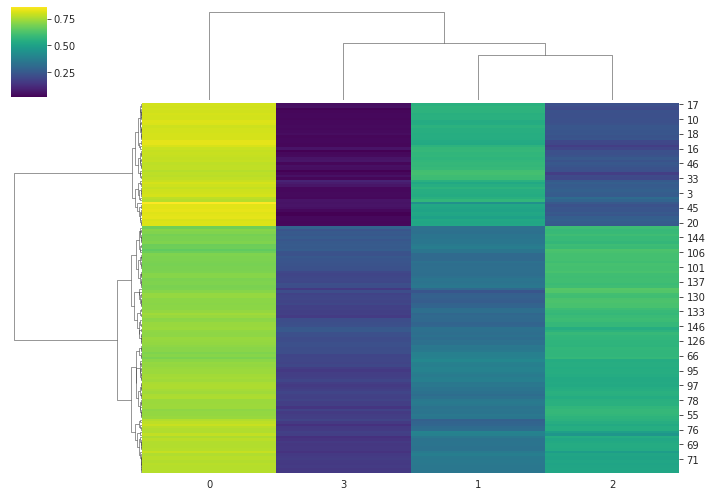

In [21]:
# Visualization with Seaborn's clustermap

import seaborn as sns

sns.clustermap(normalized_X, figsize=(10,7), method=linkage_type, cmap='viridis')

# Expand figsize to a value like (18, 50) if you want the sample labels to be readable
# Draw back is that you'll need more scrolling to observe the dendrogram

plt.show()

# **THANK YOU!**